In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

1그룹 (239개): 총 공급 좌석수 0~39999  
2그룹 (195개) : 총 공급 좌석수 40000~459999  
3그룹 (154개) : 총 공급 좌석수 460000~3999999  
4그룹 (38개) : 총 공급 좌석수 4000000~6999999  
5그룹 (35개) : 총 공급 좌석수 7000000~15000000  
(아웃라이어: 극한직업 총 공급 좌석수 22523026)

In [2]:
g2 = pd.read_csv('prime_group2.csv')
len(g2)

195

In [3]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
film.sample()

영화명      영화코드         개봉일  F-rated     장르       등급  영화구분       제작사  \
298  프리즌  20162181  2017-03-23        0  범죄,액션  청소년관람불가  일반영화  (주)큐로홀딩스   

        배급사   상영횟수  전국스크린수              전국매출액    전국관객수       서울매출액   서울관객수  \
298  (주)쇼박스  89024    1047 23790276987.000000  2931897  5681060637  679455   

                                                 감독1필모 감독1           감독1코드  \
298  프리즌|미안해 사랑해 고마워|남쪽으로 튀어|마이 웨이|마당을 나온 암탉|그 남자의 ...  나현 10007424.000000   

    감독1성별 감독2 감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별  작가 대표작가 대표작가(필명)  \
298    남자   -     -     -   -     -     -   -     -     -  나현   나현       나현   

         작가코드 작가성별 작가_대표역할                                               작가필모  \
298  10007424   남자      감독  프리즌|미안해 사랑해 고마워|남쪽으로 튀어|마이 웨이|마당을 나온 암탉|그 남자의 ...   

                                                    배우 주연배우      배우코드 배우성별  \
298  한석규,김래원,정웅인,조재윤,신성록,곽민호,박영준,임경욱,장한승,신영진,지동주,유정...  한석규  10087518   남자   

    배우_대표역할                                               배우필모  
298      배우  우상|천문: 하늘에 묻는다|프리즌|상의원|파파로티|베를린|이층의 악당|백야행|눈에는...

In [4]:
test = film[(film['감독1성별']=='여자') | (film['감독2성별']=='여자') | (film['감독3성별']=='여자') | (film['감독4성별']=='여자')]

In [5]:
len(test[test['F-rated']==1])

8

In [6]:
test2 = film[~(film['감독1성별']=='여자') | (film['감독2성별']=='여자') | (film['감독3성별']=='여자') | (film['감독4성별']=='여자')]

In [7]:
len(test2)

576

In [8]:
len(test2[test2['F-rated']==2])

29

In [9]:
29/576

0.050347222222222224

In [10]:
g2 = g2.merge(film, how='left', on='영화명')
g2.sample()

영화명    1623공급좌석수      영화코드         개봉일  F-rated           장르     등급  \
47  다이노X 탐험대 43321.000000  20162461  2016-05-04        1  애니메이션,다큐멘터리  전체관람가   

       영화구분     제작사       배급사  상영횟수  전국스크린수            전국매출액  전국관객수  \
47  독립/예술영화  (주)MBC  (주)이수C&E  3126     348 634339900.000000  82148   

        서울매출액  서울관객수     감독1필모  감독1           감독1코드 감독1성별 감독2 감독2코드 감독2성별 감독3  \
47  122013400  15164  다이노X 탐험대  이동희 20234026.000000    남자   -     -     -   -   

   감독3코드 감독3성별 감독4 감독4코드 감독4성별   작가 대표작가 대표작가(필명)      작가코드 작가성별   작가_대표역할  \
47     -     -   -     -     -  이소정  이소정      이소정  20254155   여자  시나리오(각본)   

        작가필모       배우 주연배우      배우코드 배우성별 배우_대표역할  \
47  다이노X 탐험대  정준하,하동훈  정준하  10062239   남자      배우   

                                                 배우필모  
47  다이노X 탐험대|토니 스토리: 깡통제국의 비밀|가문의 영광4 - 가문의 수난|김종욱...

In [11]:
g2.shape

(195, 42)

# F등급과 전국관객수, 총공급좌석수 단순 비교

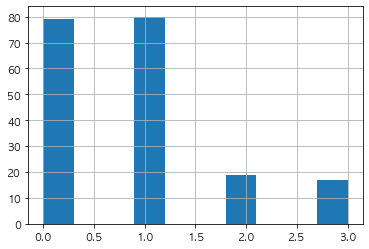

In [12]:
g2['F-rated'].hist()

In [13]:
g2.corr()

1623공급좌석수      영화코드   F-rated      상영횟수    전국스크린수     전국매출액  \
1623공급좌석수   1.000000  0.091731 -0.049668  0.650162  0.602232  0.379371   
영화코드        0.091731  1.000000  0.086682  0.149886  0.160889  0.202505   
F-rated    -0.049668  0.086682  1.000000 -0.004792 -0.051250  0.022385   
상영횟수        0.650162  0.149886 -0.004792  1.000000  0.897024  0.886226   
전국스크린수      0.602232  0.160889 -0.051250  0.897024  1.000000  0.749901   
전국매출액       0.379371  0.202505  0.022385  0.886226  0.749901  1.000000   
전국관객수       0.369182  0.197412  0.025099  0.890625  0.754794  0.998609   
서울매출액       0.513391  0.200685  0.058916  0.840953  0.640289  0.922770   
서울관객수       0.501946  0.198278  0.060265  0.857321  0.653454  0.930608   
감독1코드      -0.024738  0.117779  0.036251  0.074902  0.082110  0.064770   
작가코드       -0.014102 -0.005779  0.088712 -0.028388  0.015206 -0.047333   
배우코드       -0.020421  0.043338  0.192841 -0.043293 -0.129938  0.025161   

              전국관객수     서울매출액     서울관객수     감독1코드      작가코드      배우코드  
1623공급좌석수  0.369182  0.513391  0.501946 -0.024738 -0.014102 -0.020421  
영화코드       0.197412  0.200685  0.198278  0.117779 -0.005779  0.043338  
F-rated    0.025099  0.058916  0.060265  0.036251  0.088712  0.192841  
상영횟수       0.890625  0.840953  0.857321  0.074902 -0.028388 -0.043293  
전국스크린수     0.754794  0.640289  0.653454  0.082110  0.015206 -0.129938  
전국매출액      0.998609  0.922770  0.930608  0.064770 -0.047333  0.025161  
전국관객수      1.000000  0.912107  0.924630  0.068367 -0.041892  0.017489  
서울매출액      0.912107  1.000000  0.994091  0.010448 -0.101782  0.080590  
서울관객수      0.924630  0.994091  1.000000  0.012979 -0.096111  0.073843  
감독1코드      0.068367  0.010448  0.012979  1.000000  0.714828  0.213323  
작가코드      -0.041892 -0.101782 -0.096111  0.714828  1.000000  0.165987  
배우코드       0.017489  0.080590  0.073843  0.213323  0.165987  1.000000

In [16]:
px.scatter(g2, x='1623공급좌석수', y='전국관객수', color='F-rated', hover_name='영화명', trendline='ols')

총공급좌석수에 비해 전국관객수가 높은 것은 대부분 애니메이션이다.

# 애니메이션의 좌석판매율 확인

In [17]:
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
screen.shape

(39749, 20)

In [18]:
screen.sample()

영화코드 영화명         개봉일      점유율집계일                       개봉n일차  \
16352  20151228  공조  2017-01-18  2017-02-22  35 days 00:00:00.000000000   

       개봉n일차(int)  상영횟수    상영점유율  상영점유율순위  스크린수    스크린점유율  스크린점유율순위    좌석수  \
16352          35   629 6.453000        5   339 12.100000         5  81532   

          좌석판매율    좌석점유율  좌석점유율순위       매출액        누적매출액    관객수    누적관객수  
16352 19.300000 2.830000        5  97681700  63118550526  15745  7734754

In [19]:
g2_daily = g2.merge(screen, how='left', on='영화코드')
g2_daily.shape

(13152, 61)

In [20]:
g2_daily['영화명_x'].nunique()

195

In [21]:
g2_daily.sample()

영화명_x    1623공급좌석수      영화코드       개봉일_x  F-rated     장르        등급  \
6929  서산개척단 53010.000000  20183384  2018-05-24        0  다큐멘터리  12세이상관람가   

         영화구분     제작사       배급사  상영횟수_x  전국스크린수           전국매출액  전국관객수  \
6929  독립/예술영화  (주)훈프로  (주)인디플러그     776      52 43554100.000000   5260   

         서울매출액  서울관객수          감독1필모  감독1           감독1코드 감독1성별  감독2  \
6929  24398400   2724  서산개척단|잘 되길 바라  이조훈 20303810.000000    남자  정승현   

           감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별   작가 대표작가 대표작가(필명)  \
6929  20189538.0    남자   -     -     -   -     -     -  이훈규  이훈규      이훈규   

          작가코드 작가성별 작가_대표역할   작가필모  \
6929  20304731   남자    프로듀서  서산개척단   

                                                     배우 주연배우      배우코드 배우성별  \
6929  정영철,하용복,윤기숙,정화자,이상범,손연복,김연,김연,김성준,김재권,이규동,이승현,이정수  정영철  20304709   남자   

     배우_대표역할   배우필모  영화명_y       개봉일_y      점유율집계일                      개봉n일차  \
6929      배우  서산개척단  서산개척단  2018-05-24  2018-06-02  9 days 00:00:00.000000000   

      개봉n일차(int)  상영횟수_y    상영점유율  상영점유율순위  스크린수   스크린점유율  스크린점유율순위   좌석수  \
6929           9      26 0.273000        5    23 0.900000         5  3069   

        좌석판매율    좌석점유율  좌석점유율순위     매출액     누적매출액  관객수  누적관객수  
6929 3.400000 0.100000        5  766100  38010300  103   4377

In [22]:
g2_daily = g2_daily.drop(['개봉일_x', '영화명_y'], axis=1).rename(columns={'F-rated':'F등급', '영화명_x':'영화명', '상영횟수_x':'전체상영횟수', '개봉일_y':'개봉일', '상영횟수_y':'일일상영횟수'})
g2_daily.columns

Index(['영화명', '1623공급좌석수', '영화코드', 'F등급', '장르', '등급', '영화구분', '제작사', '배급사',
       '전체상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '감독1필모', '감독1',
       '감독1코드', '감독1성별', '감독2', '감독2코드', '감독2성별', '감독3', '감독3코드', '감독3성별',
       '감독4', '감독4코드', '감독4성별', '작가', '대표작가', '대표작가(필명)', '작가코드', '작가성별',
       '작가_대표역할', '작가필모', '배우', '주연배우', '배우코드', '배우성별', '배우_대표역할', '배우필모',
       '개봉일', '점유율집계일', '개봉n일차', '개봉n일차(int)', '일일상영횟수', '상영점유율', '상영점유율순위',
       '스크린수', '스크린점유율', '스크린점유율순위', '좌석수', '좌석판매율', '좌석점유율', '좌석점유율순위', '매출액',
       '누적매출액', '관객수', '누적관객수'],
      dtype='object')

In [23]:
g2_daily['장르'].unique()

array(['공포(호러)', '다큐멘터리', '드라마', '범죄,코미디', '코미디', '드라마,다큐멘터리', '액션,드라마',
       '애니메이션', '드라마,코미디', '멜로/로맨스', '범죄,액션,드라마', '범죄,액션',
       '애니메이션,어드벤처,코미디,가족', '드라마,판타지', '애니메이션,어드벤처,코미디', '애니메이션,다큐멘터리',
       '애니메이션,판타지,어드벤처', '액션', '드라마,멜로/로맨스', '멜로/로맨스,드라마', '공연',
       '애니메이션,코미디,판타지,어드벤처,멜로/로맨스', '공포(호러),스릴러', '멜로/로맨스,코미디',
       '미스터리,스릴러', '다큐멘터리,드라마', '기타', '판타지,가족', '스릴러,코미디', '미스터리,드라마',
       '애니메이션,가족', '스릴러', '가족,멜로/로맨스,코미디', '드라마,범죄,미스터리', '미스터리,공포(호러)',
       '드라마,범죄,스릴러', '코미디,드라마', '드라마,가족', '공포(호러),미스터리', '사극,액션',
       '코미디,멜로/로맨스', '코미디,액션', '액션,어드벤처', '드라마,미스터리', '미스터리,판타지',
       '다큐멘터리,액션', '범죄,드라마', '스릴러,드라마', '가족,드라마'], dtype=object)

In [24]:
g2_daily['장르_1번째'] = g2_daily['장르'].apply(lambda x: x.split(',')[0].strip())
g2_daily['장르_1번째'].unique()

array(['공포(호러)', '다큐멘터리', '드라마', '범죄', '코미디', '액션', '애니메이션', '멜로/로맨스',
       '공연', '미스터리', '기타', '판타지', '스릴러', '가족', '사극'], dtype=object)

In [25]:
ani = g2_daily[g2_daily['장르_1번째']=='애니메이션']
len(ani)

2507

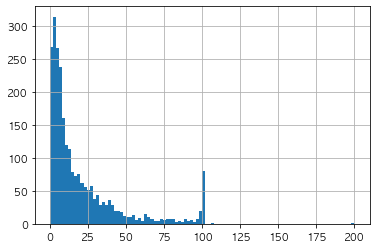

In [26]:
ani['좌석판매율'].hist(bins=100)

In [27]:
ani['좌석판매율'].describe()

count   2507.000000
mean      20.306382
std       24.996946
min        0.000000
25%        4.300000
50%       10.000000
75%       26.200000
max      200.000000
Name: 좌석판매율, dtype: float64

In [28]:
# 좌석판매율이 100 넘는 것들.. 온갖 추측 중
ani[ani['좌석판매율']>100]

영화명     1623공급좌석수      영화코드  F등급                         장르     등급  \
3418  다이노 타임  75815.000000  20100211    1             애니메이션,어드벤처,코미디  전체관람가   
4388    레드슈즈 338944.000000  20198323    1  애니메이션,코미디,판타지,어드벤처,멜로/로맨스  전체관람가   
8648     언더독 297126.000000  20186324    0                      애니메이션  전체관람가   

      영화구분       제작사                  배급사  전체상영횟수  전국스크린수             전국매출액  \
3418  일반영화  주식회사 토이온            씨제이이앤엠(주)    6743     430 2099683100.000000   
4388  일반영화   (주)싸이더스  (주)넥스트엔터테인먼트월드(NEW)   20363     717 6098956190.000000   
8648  일반영화   (주)오돌또기  (주)넥스트엔터테인먼트월드(NEW)   10753     612 1485934830.000000   

       전국관객수       서울매출액   서울관객수  \
3418  283300   405724600   52818   
4388  816906  1380911550  201881   
8648  193484   420191450   50913   

                                                  감독1필모  감독1           감독1코드  \
3418                                          다이노 타임|엄마  최윤석 20167014.000000   
4388  레드슈즈|다이노 타임|마당을 나온 암탉|고양이: 죽음을 보는 두 개의 눈|차우|원더...  홍성호 10089591.000000   
8648  언더독|26년|마당을 나온 암탉|사람이되어라|별별 이야기 2-여섯 빛깔 무지개|별별...  오성윤 20112890.000000   

     감독1성별    감독2       감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별  \
3418    남자  존 카프카  10068301.0    남자   -     -     -   -     -     -   
4388    남자      -           -     -   -     -     -   -     -     -   
8648    남자    이춘백  10057737.0    남자   -     -     -   -     -     -   

                                  작가 대표작가 대표작가(필명)      작가코드 작가성별    작가_대표역할  \
3418  박재우, 제임스 그레코, 재커리 로젠블라트, 애덤 비첸  박재우      박재우  20229507   남자   시나리오(각본)   
4388                             홍성호  홍성호      홍성호  10089591   남자  VFX 슈퍼바이저   
8648                             오성윤  오성윤      오성윤  20112890   남자         감독   

                                                   작가필모  \
3418                  극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지|다이노 타임   
4388  레드슈즈|다이노 타임|마당을 나온 암탉|고양이: 죽음을 보는 두 개의 눈|차우|원더...   
8648  언더독|26년|마당을 나온 암탉|사람이되어라|별별 이야기 2-여섯 빛깔 무지개|별별...   

                                                배우      주연배우      배우코드 배우성별  \
3418  멜라니 그리피스,제인 린치,윌리엄 볼드윈,스티븐 볼드윈,롭 슈나이더,유리 로웬탈  멜라니 그리피스  10025920   여자   
4388       클로이 모레츠,샘 클라플린,지나 거손,패트릭 워버튼,짐 래쉬,아바 콜커   클로이 모레츠  20112356   여자   
8648                도경수,박소담,박철민,강석,이준혁,연지원,전숙경,박중금       도경수  20209526   남자   

     배우_대표역할                                               배우필모         개봉일  \
3418      배우  다크 투어리스트|다이노 타임|새미의 어드벤쳐|쉐이드|템포|세실 B. 디멘티드|러빙 ...  2015-04-30   
4388      배우  아담스 패밀리|레드슈즈|우먼 인 할리우드|마담 싸이코|서스페리아|브레인 온 파이어|...  2019-07-25   
8648      배우           언더독|스윙키즈|신과함께-인과 연|신과함께-죄와 벌|7호실|형|순정|카트  2019-01-16   

          점유율집계일                         개봉n일차  개봉n일차(int)  일일상영횟수    상영점유율  \
3418  2015-04-21   -9 days +00:00:00.000000000          -9       1 0.018000   
4388  2019-06-21  -34 days +00:00:00.000000000         -34       1 0.015000   
8648  2019-03-31    74 days 00:00:00.000000000          74       4 0.056000   

      상영점유율순위  스크린수   스크린점유율  스크린점유율순위  좌석수      좌석판매율    좌석점유율  좌석점유율순위  \
3418       17     1 0.100000        13  202 107.900000 0.010000       16   
4388       18     1 0.100000        17   91 200.000000 0.000000       26   
8648       16     4 0.200000        15  608 100.800000 0.020000       14   

          매출액       누적매출액  관객수   누적관객수 장르_1번째  
3418  1744000     3884000  218     432  애니메이션  
4388   910000      910000  182     182  애니메이션  
8648  4904000  1488861830  613  193837  애니메이션

# OLS Regression

In [29]:
from statsmodels.formula.api import ols

In [30]:
# 장르 - 좌석판매율
ols('좌석판매율~C(장르_1번째)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.397
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.59e-05
Time:                        10:13:04   Log-Likelihood:                -62624.
No. Observations:               13152   AIC:                         1.253e+05
Df Residuals:                   13137   BIC:                         1.254e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.8224      3.071      3.199      0.001       3.804      15.841
C(장르_1번째)[T.공연]        28.3589      7.715      3.676      0.000      13.237      43.481
C(장르_1번째)[T.공포(호러)]    10.2907      3.949      2.606      0.009       2.551      18.031
C(장르_1번째)[T.기타]        19.3538      6.899      2.805      0.005       5.832      32.876
C(장르_1번째)[T.다큐멘터리]     12.1069      3.102      3.902      0.000       6.026      18.188
C(장르_1번째)[T.드라마]       10.8219      3.100      3.491      0.000       4.746      16.898
C(장르_1번째)[T.멜로/로맨스]     9.1192      3.234      2.820      0.005       2.781      15.458
C(장르_1번째)[T.미스터리]       7.6294      3.739      2.040      0.041       0.300      14.959
C(장르_1번째)[T.범죄]         7.0202      3.791      1.852      0.064      -0.412      14.452
C(장르_1번째)[T.사극]        23.7634      6.899      3.445      0.001      10.241      37.286
C(장르_1번째)[T.스릴러]        9.7378      3.768      2.584      0.010       2.352      17.124
C(장르_1번째)[T.애니메이션]     10.4840      3.122      3.358      0.001       4.364      16.604
C(장르_1번째)[T.액션]         6.3053      3.993      1.579      0.114      -1.521      14.132
C(장르_1번째)[T.코미디]        8.5774      3.413      2.513      0.012       1.888      15.267
C(장르_1번째)[T.판타지]        9.2288      4.355      2.119      0.034       0.692      17.766
==============================================================================
Omnibus:                     4543.564   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12177.275
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                       5.756   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# 장르,F등급 - 좌석판매율
ols("좌석판매율~C(장르_1번째) * F등급", g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.814
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           7.06e-14
Time:                        10:13:04   Log-Likelihood:                -62590.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13127   BIC:                         1.254e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.0537      3.844      1.835      0.067      -0.481      14.588
C(장르_1번째)[T.공연]            31.1275      8.040      3.872      0.000      15.368      46.887
C(장르_1번째)[T.공포(호러)]        24.7996      6.432      3.856      0.000      12.192      37.408
C(장르_1번째)[T.기타]             9.1634      3.469      2.642      0.008       2.365      15.962
C(장르_1번째)[T.다큐멘터리]         13.2209      3.894      3.396      0.001       5.589      20.853
C(장르_1번째)[T.드라마]           10.6524      3.895      2.735      0.006       3.017      18.288
C(장르_1번째)[T.멜로/로맨스]        13.5302      4.177      3.239      0.001       5.342      21.718
C(장르_1번째)[T.미스터리]          10.9467      5.259      2.081      0.037       0.638      21.256
C(장르_1번째)[T.범죄]            11.6442      4.729      2.462      0.014       2.375      20.913
C(장르_1번째)[T.사극]            26.5320      7.264      3.652      0.000      12.293      40.771
C(장르_1번째)[T.스릴러]            9.0202      5.132      1.758      0.079      -1.040      19.080
C(장르_1번째)[T.애니메이션]         13.7226      3.951      3.473      0.001       5.977      21.468
C(장르_1번째)[T.액션]             9.0739      4.611      1.968      0.049       0.035      18.112
C(장르_1번째)[T.코미디]           10.6346      4.275      2.488      0.013       2.256      19.013
C(장르_1번째)[T.판타지]           11.9975      4.927      2.435      0.015       2.340      21.655
F등급                         3.7957      3.183      1.193      0.233      -2.443      10.034
C(장르_1번째)[T.공연]:F등급     -1.937e-15   2.26e-15     -0.858      0.391   -6.37e-15    2.49e-15
C(장르_1번째)[T.공포(호러)]:F등급   -19.0581      6.686     -2.850      0.004     -32.164      -5.952
C(장르_1번째)[T.기타]:F등급         9.1634      3.469      2.642      0.008       2.365      15.962
C(장르_1번째)[T.다큐멘터리]:F등급     -2.1354      3.212     -0.665      0.506      -8.432       4.161
C(장르_1번째)[T.드라마]:F등급       -1.1635      3.210     -0.362      0.717      -7.455       5.128
C(장르_1번째)[T.멜로/로맨스]:F등급    -4.8609      3.290     -1.478      0.140     -11.309       1.588
C(장르_1번째)[T.미스터리]:F등급      -4.2084      3.854     -1.092      0.275     -11.763       3.346
C(장르_1번째)[T.범죄]:F등급        -7.8032      4.748     -1.644      0.100     -17.110       1.503
C(장르_1번째)[T.사극]:F등급      2.457e-15   7.86e-16      3.126      0.002    9.16e-16       4e-15
C(장르_1번째)[T.스릴러]:F등급        2.1203      5.455      0.389      0.697      -8.571      12.812
C(장르_1번째)[T.애니메이션]:F등급     -4.3120      3.280     -1.315      0.189     -10.741       2.117
C(장르_1번째)[T.액션]:F등급              0          0        nan        nan           0           0
C(장르_1번째)[T.코미디]:F등급       -2.6743      3.650     -0.733      0.464      -9.829       4.481
C(장르_1번째)[T.판타지]:F등급             0          0        nan        nan           0           0
===============================================

In [32]:
# 배우성별 - 좌석판매율
ols('좌석판매율~C(배우성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3525
Date:                Tue, 10 Dec 2019   Prob (F-statistic):              0.553
Time:                        10:13:05   Log-Likelihood:                -62647.
No. Observations:               13152   AIC:                         1.253e+05
Df Residuals:                   13150   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.7813      0.342     60.709      0.000      20.110      21.452
C(배우성별)[T.여자]    -0.2938      0.495     -0.594      0.553      -1.264       0.676
==============================================================================
Omnibus:                     4541.585   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12142.800
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                       5.741   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# 감독성별 - 좌석판매율
ols('좌석판매율~C(감독1성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     53.15
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           3.27e-13
Time:                        10:13:05   Log-Likelihood:                -62621.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13150   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.7420      0.276     71.592      0.000      19.201      20.283
C(감독1성별)[T.여자]     4.4973      0.617      7.290      0.000       3.288       5.706
==============================================================================
Omnibus:                     4545.304   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12187.601
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                       5.758   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# 작가성별 - 좌석판매율
ols('좌석판매율~C(작가성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     41.30
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.35e-10
Time:                        10:13:05   Log-Likelihood:                -62627.
No. Observations:               13152   AIC:                         1.253e+05
Df Residuals:                   13150   BIC:                         1.253e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.5608      0.299     65.517      0.000      18.976      20.146
C(작가성별)[T.여자]     3.4091      0.530      6.426      0.000       2.369       4.449
==============================================================================
Omnibus:                     4543.868   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12182.960
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                       5.758   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 감독성별,작가성별,배우성별 - 좌석판매율
ols('좌석판매율~C(감독1성별) + C(작가성별) + C(배우성별)', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.38
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.55e-12
Time:                        10:13:06   Log-Likelihood:                -62619.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13148   BIC:                         1.253e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.8850      0.379     52.419      0.000      19.141      20.629
C(감독1성별)[T.여자]     3.6235      0.900      4.024      0.000       1.859       5.388
C(작가성별)[T.여자]      1.1917      0.767      1.554      0.120      -0.312       2.695
C(배우성별)[T.여자]     -0.7226      0.501     -1.442      0.149      -1.705       0.259
==============================================================================
Omnibus:                     4541.875   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12176.661
Skew:                           1.911   Prob(JB):                         0.00
Kurtosis:                       5.759   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

감독이 여성일 때 좌석판매율이 더 높음

In [36]:
ols('좌석판매율~영화구분', g2_daily).fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     69.97
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           6.62e-17
Time:                        10:13:07   Log-Likelihood:                -62613.
No. Observations:               13152   AIC:                         1.252e+05
Df Residuals:                   13150   BIC:                         1.252e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       19.3999      0.288     67.430      0.000      18.836      19.964
영화구분[T.일반영화]     4.6678      0.558      8.365      0.000       3.574       5.762
==============================================================================
Omnibus:                     4595.742   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12483.495
Skew:                           1.928   Prob(JB):                         0.00
Kurtosis:                       5.814   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
ols('총공급좌석수~영화구분', g2_daily).fit().summary() 

PatsyError: Error evaluating factor: NameError: name '총공급좌석수' is not defined
    총공급좌석수~영화구분
    ^^^^^^

# 개봉 2일차 성적 비교
보통 개봉을 목요일에 하므로 개봉 첫 주 토요일이 2일차

In [38]:
g2_daily.columns

Index(['영화명', '1623공급좌석수', '영화코드', 'F등급', '장르', '등급', '영화구분', '제작사', '배급사',
       '전체상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '감독1필모', '감독1',
       '감독1코드', '감독1성별', '감독2', '감독2코드', '감독2성별', '감독3', '감독3코드', '감독3성별',
       '감독4', '감독4코드', '감독4성별', '작가', '대표작가', '대표작가(필명)', '작가코드', '작가성별',
       '작가_대표역할', '작가필모', '배우', '주연배우', '배우코드', '배우성별', '배우_대표역할', '배우필모',
       '개봉일', '점유율집계일', '개봉n일차', '개봉n일차(int)', '일일상영횟수', '상영점유율', '상영점유율순위',
       '스크린수', '스크린점유율', '스크린점유율순위', '좌석수', '좌석판매율', '좌석점유율', '좌석점유율순위', '매출액',
       '누적매출액', '관객수', '누적관객수', '장르_1번째'],
      dtype='object')

In [39]:
day2 = g2_daily[g2_daily['개봉n일차(int)']==2]

In [40]:
len(day2)

195

In [41]:
day2.corr()

1623공급좌석수      영화코드       F등급    전체상영횟수    전국스크린수     전국매출액  \
1623공급좌석수    1.000000  0.091731 -0.049668  0.650162  0.602232  0.379371   
영화코드         0.091731  1.000000  0.086682  0.149886  0.160889  0.202505   
F등급         -0.049668  0.086682  1.000000 -0.004792 -0.051250  0.022385   
전체상영횟수       0.650162  0.149886 -0.004792  1.000000  0.897024  0.886226   
전국스크린수       0.602232  0.160889 -0.051250  0.897024  1.000000  0.749901   
전국매출액        0.379371  0.202505  0.022385  0.886226  0.749901  1.000000   
전국관객수        0.369182  0.197412  0.025099  0.890625  0.754794  0.998609   
서울매출액        0.513391  0.200685  0.058916  0.840953  0.640289  0.922770   
서울관객수        0.501946  0.198278  0.060265  0.857321  0.653454  0.930608   
감독1코드       -0.024738  0.117779  0.036251  0.074902  0.082110  0.064770   
작가코드        -0.014102 -0.005779  0.088712 -0.028388  0.015206 -0.047333   
배우코드        -0.020421  0.043338  0.192841 -0.043293 -0.129938  0.025161   
개봉n일차(int)        nan       nan       nan       nan       nan       nan   
일일상영횟수       0.676218  0.086366 -0.065444  0.902102  0.933771  0.729219   
상영점유율        0.495046  0.061925 -0.069485  0.691116  0.691912  0.566784   
상영점유율순위     -0.451358 -0.004393  0.067711 -0.526870 -0.571248 -0.403458   
스크린수         0.624657  0.155441 -0.061871  0.896455  0.987454  0.730077   
스크린점유율       0.529979  0.043682 -0.085770  0.777118  0.831796  0.634956   
스크린점유율순위    -0.399229  0.008730  0.096164 -0.528355 -0.602370 -0.381246   
좌석수          0.651364  0.079808 -0.061777  0.891225  0.914698  0.739513   
좌석판매율        0.216105  0.088177  0.060210  0.565512  0.445110  0.715899   
좌석점유율        0.654892  0.035610 -0.066324  0.882064  0.908269  0.722007   
좌석점유율순위     -0.446054 -0.005363  0.070009 -0.528268 -0.570704 -0.417862   
매출액          0.350662  0.156444  0.014855  0.800839  0.710867  0.876133   
누적매출액        0.411052  0.186143 -0.010928  0.752871  0.706691  0.879989   
관객수          0.336055  0.148669  0.014080  0.801332  0.712994  0.873889   
누적관객수        0.401814  0.179196 -0.004260  0.772014  0.726407  0.889873   

               전국관객수     서울매출액     서울관객수     감독1코드      작가코드      배우코드  \
1623공급좌석수   0.369182  0.513391  0.501946 -0.024738 -0.014102 -0.020421   
영화코드        0.197412  0.200685  0.198278  0.117779 -0.005779  0.043338   
F등급         0.025099  0.058916  0.060265  0.036251  0.088712  0.192841   
전체상영횟수      0.890625  0.840953  0.857321  0.074902 -0.028388 -0.043293   
전국스크린수      0.754794  0.640289  0.653454  0.082110  0.015206 -0.129938   
전국매출액       0.998609  0.922770  0.930608  0.064770 -0.047333  0.025161   
전국관객수       1.000000  0.912107  0.924630  0.068367 -0.041892  0.017489   
서울매출액       0.912107  1.000000  0.994091  0.010448 -0.101782  0.080590   
서울관객수       0.924630  0.994091  1.000000  0.012979 -0.096111  0.073843   
감독1코드       0.068367  0.010448  0.012979  1.000000  0.714828  0.213323   
작가코드       -0.041892 -0.101782 -0.096111  0.714828  1.000000  0.165987   
배우코드        0.017489  0.080590  0.073843  0.213323  0.165987  1.000000   
개봉n일차(int)       nan       nan       nan       nan       nan       nan   
일일상영횟수      0.732775  0.643699  0.654627  0.030769 -0.019288 -0.099128   
상영점유율       0.571745  0.478936  0.494886  0.019184 -0.057626 -0.147936   
상영점유율순위    -0.404532 -0.371127 -0.378966 -0.030288 -0.003368  0.066644   
스크린수        0.735670  0.627091  0.642756  0.080823  0.009195 -0.121762   
스크린점유율      0.643729  0.530452  0.557029  0.041095 -0.014507 -0.157256   
스크린점유율순위   -0.386690 -0.327224 -0.341567 -0.066772 -0.047886  0.112856   
좌석수         0.741942  0.657150  0.664607  0.028044 -0.018650 -0.090591   
좌석판매율       0.708896  0.725617  0.717118  0.064626 -0.019314  0.055900   
좌석점유율       0.724710  0.639654  0.646238  0.013939 -0.026591 -0.101458   
좌석점유율순위    -0.418691 -0.392088 -0.398943 -0.034389 -0.027827  0.088185   
매출액         0.874067  0.772875  0.774277  0.079921 -0.009391  0.016761   
누적매출액       0.865657  0.823815  0.804515  0.044143 -0.061472 

In [42]:
# 애니 제외
day2_exc_ani = day2[day2['장르_1번째']=='애니메이션']

In [43]:
day2_exc_ani.corr()

1623공급좌석수      영화코드       F등급    전체상영횟수    전국스크린수     전국매출액  \
1623공급좌석수    1.000000  0.343012 -0.064647  0.770718  0.679520  0.637736   
영화코드         0.343012  1.000000 -0.050029  0.522116  0.567388  0.487034   
F등급         -0.064647 -0.050029  1.000000  0.141446  0.135028  0.212424   
전체상영횟수       0.770718  0.522116  0.141446  1.000000  0.914856  0.948293   
전국스크린수       0.679520  0.567388  0.135028  0.914856  1.000000  0.869477   
전국매출액        0.637736  0.487034  0.212424  0.948293  0.869477  1.000000   
전국관객수        0.634374  0.478667  0.219253  0.946274  0.863147  0.999497   
서울매출액        0.726163  0.456169  0.197553  0.951861  0.830528  0.967853   
서울관객수        0.711814  0.449382  0.195493  0.931185  0.795567  0.948495   
감독1코드       -0.110710  0.083260 -0.021875  0.064302  0.216239  0.073988   
작가코드        -0.287186  0.037251  0.047200 -0.225915 -0.071921 -0.124233   
배우코드         0.124666  0.283709  0.143637  0.161145  0.094522  0.177395   
개봉n일차(int)        nan       nan       nan       nan       nan       nan   
일일상영횟수       0.741670  0.447796  0.138999  0.874816  0.832573  0.783371   
상영점유율        0.513637  0.356332  0.139514  0.661743  0.540296  0.612514   
상영점유율순위     -0.474666 -0.261290 -0.248135 -0.724930 -0.730347 -0.695146   
스크린수         0.734361  0.560620  0.081913  0.923116  0.942256  0.853948   
스크린점유율       0.571609  0.362087  0.177304  0.778188  0.695038  0.752042   
스크린점유율순위    -0.388015 -0.246166 -0.223855 -0.653887 -0.672804 -0.622146   
좌석수          0.718841  0.389774  0.144410  0.826756  0.788645  0.719229   
좌석판매율        0.169580  0.103769  0.130635  0.481833  0.389559  0.571284   
좌석점유율        0.712572  0.354576  0.170699  0.823486  0.775325  0.716851   
좌석점유율순위     -0.459205 -0.240183 -0.258359 -0.716348 -0.699881 -0.684290   
매출액          0.548126  0.379736  0.233586  0.783899  0.714602  0.780256   
누적매출액        0.474155  0.437208  0.220521  0.732336  0.766527  0.813099   
관객수          0.537834  0.369286  0.232067  0.778534  0.708891  0.775988   
누적관객수        0.461844  0.423803  0.234435  0.724216  0.756901  0.808502   

               전국관객수     서울매출액     서울관객수     감독1코드      작가코드      배우코드  \
1623공급좌석수   0.634374  0.726163  0.711814 -0.110710 -0.287186  0.124666   
영화코드        0.478667  0.456169  0.449382  0.083260  0.037251  0.283709   
F등급         0.219253  0.197553  0.195493 -0.021875  0.047200  0.143637   
전체상영횟수      0.946274  0.951861  0.931185  0.064302 -0.225915  0.161145   
전국스크린수      0.863147  0.830528  0.795567  0.216239 -0.071921  0.094522   
전국매출액       0.999497  0.967853  0.948495  0.073988 -0.124233  0.177395   
전국관객수       1.000000  0.968367  0.950655  0.061467 -0.125055  0.176040   
서울매출액       0.968367  1.000000  0.994850  0.011117 -0.231000  0.245812   
서울관객수       0.950655  0.994850  1.000000 -0.032154 -0.238274  0.260461   
감독1코드       0.061467  0.011117 -0.032154  1.000000  0.137125  0.085718   
작가코드       -0.125055 -0.231000 -0.238274  0.137125  1.000000 -0.135739   
배우코드        0.176040  0.245812  0.260461  0.085718 -0.135739  1.000000   
개봉n일차(int)       nan       nan       nan       nan       nan       nan   
일일상영횟수      0.780063  0.776045  0.744058  0.112313 -0.134860  0.206932   
상영점유율       0.607466  0.597539  0.574015  0.078588 -0.247519 -0.032175   
상영점유율순위    -0.694746 -0.695439 -0.675671 -0.083151  0.223426 -0.095626   
스크린수        0.848601  0.836972  0.807380  0.211511 -0.135740  0.180594   
스크린점유율      0.749955  0.749648  0.740877  0.093231 -0.229886  0.047631   
스크린점유율순위   -0.621356 -0.619821 -0.602188 -0.132980  0.212189 -0.041725   
좌석수         0.716954  0.715859  0.683011  0.106381 -0.102407  0.182944   
좌석판매율       0.567762  0.507606  0.489017  0.165483  0.065906  0.039308   
좌석점유율       0.715337  0.711001  0.674809  0.097933 -0.138745  0.158832   
좌석점유율순위    -0.685483 -0.685125 -0.667998 -0.043892  0.208786 -0.079209   
매출액         0.774550  0.733453  0.699207  0.182447  0.023359  0.149644   
누적매출액       0.806603  0.748677  0.712504  0.267823 -0.005749 

개봉 2일차에 여성영화의 좌석판매율이 더 크다. (양의 상관관계)

# 개봉 5일차 데이터 두 번 들어간 영화 확인

In [44]:
day5 = g2_daily[g2_daily['개봉n일차(int)']==5]

In [45]:
len(day5)

196

In [46]:
day5['영화명'].value_counts()

산다                         2
극장판 또봇: 로봇군단의 습격           1
검은손                        1
명량: 회오리 바다를 향하여            1
해피 투게더                     1
산상수훈                       1
귀향, 끝나지 않은 이야기             1
마차 타고 고래고래                 1
서서평, 천천히 평온하게              1
우리집                        1
잡아야 산다                     1
러브 유어셀프 인 서울               1
당신의 부탁                     1
대결                         1
비밥바룰라                      1
썬키스 패밀리                    1
1919 유관순                   1
우리는 썰매를 탄다                 1
다시, 벚꽃                     1
그 후                        1
극장판 헬로카봇 : 백악기 시대          1
최악의 하루                     1
0.0MHz                     1
멜리스                        1
시민 노무현                     1
타투                         1
더 테이블                      1
내게 남은 사랑을                  1
벌새                         1
다시, 봄                      1
머니백                        1
엄마의 공책                     1
우리들                        1
소공녀                        1
출국            

In [47]:
day5[day5['영화명']=='산다']

영화명    1623공급좌석수      영화코드  F등급   장르       등급     영화구분  \
6436  산다 44082.000000  20148449    0  드라마  청소년관람불가  독립/예술영화   
6437  산다 44082.000000  20148449    0  드라마  청소년관람불가  독립/예술영화   

                         제작사        배급사  전체상영횟수  전국스크린수           전국매출액  \
6436  세컨드윈드 필름,(유)산다문화산업전문회사  (주)리틀빅픽쳐스     604      33 29754200.000000   
6437  세컨드윈드 필름,(유)산다문화산업전문회사  (주)리틀빅픽쳐스     604      33 29754200.000000   

      전국관객수     서울매출액  서울관객수  \
6436   3829  21686200   2673   
6437   3829  21686200   2673   

                                                  감독1필모  감독1           감독1코드  \
6436  파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...  박정범 10029163.000000   
6437  파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...  박정범 10029163.000000   

     감독1성별 감독2 감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별   작가 대표작가 대표작가(필명)  \
6436    남자   -     -     -   -     -     -   -     -     -  박정범  박정범      박정범   
6437    남자   -     -     -   -     -     -   -     -     -  박정범  박정범      박정범   

          작가코드 작가성별 작가_대표역할  \
6436  10029163   남자      감독   
6437  10029163   남자      감독   

                                                   작가필모  \
6436  파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...   
6437  파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...   

                                                     배우 주연배우      배우코드 배우성별  \
6436  박정범,이승연,이재동,이재복,이찬호,장민애,전용선,전지현,고상훈,정동구,서진원,서호...  박정범  10029163   남자   
6437  박정범,이승연,이재동,이재복,이찬호,장민애,전용선,전지현,고상훈,정동구,서진원,서호...  박정범  10029163   남자   

     배우_대표역할                                               배우필모         개봉일  \
6436      배우  파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...  2015-05-21   
6437      배우  파고|이 세상에 없는|춘몽|오늘영화|산다|일주일|무산일기|시|주리|두한에게|125 ...  2015-05-21   

          점유율집계일                      개봉n일차  개봉n일차(int)  일일상영횟수    상영점유율  \
6436  2015-05-26  5 days 00:00:00.000000000           5      47 0.800000   
6437  2015-05-26  5 days 00:00:00.000000000           5       1 0.017000   

      상영점유율순위  스크린수   스크린점유율  스크린점유율순위   좌석수     좌석판매율    좌석점유율  좌석점유율순위  \
6436        4    29 2.000000         4  4837  2.400000 0.210000        4   
6437       21     1 0.100000        18   143 11.900000 0.010000       19   

         매출액     누적매출액  관객수  누적관객수 장르_1번째  
6436  852500  23683700  114   3157    드라마  
6437   51000   1331000   17    349    드라마

6437번은 drop

In [48]:
g2_daily = g2_daily.drop([6437], axis=0)

In [49]:
#g2_daily.to_csv('prime_group2_daily.csv', index=False)

In [50]:
g2_daily['개봉n일차(int)'].value_counts()

 0       195
 2       195
 6       195
 1       195
 4       195
 3       195
 5       195
 9       194
 11      193
 7       193
 8       193
 12      192
 13      191
 10      191
 15      186
 14      186
 16      180
 17      179
 18      178
 19      175
 20      175
 21      159
 22      154
 23      153
 25      152
 24      151
 27      147
 26      146
 28      138
 33      134
 29      133
 30      131
 32      130
 34      130
 31      127
 35      118
 39      115
 36      115
 40      113
 38      111
 37      111
 41      110
-1       102
 43       99
 45       99
 42       96
 47       96
 44       93
 48       92
 46       91
 50       83
-2        81
 52       79
 49       79
-7        78
 55       77
 53       77
 54       75
 51       73
-6        70
 56       68
 57       66
 58       65
-8        64
 59       63
-3        62
-9        61
 62       61
 60       60
 64       59
 61       57
 63       55
 68       52
 65       49
 66       48
 67       47
 69       47

2그룹에 있는 모든 영화 195개가 개봉 0~6일차에 1번 이상 상영했다.  
0~6일차만 남겨서 비교해보자.

# 개봉 n일차 좌석판매율 변화

In [51]:
# F-3 좌석판매율 변화
f3 = g2_daily[g2_daily['F등급']==3]
px.line(f3, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [52]:
# F-2 좌석판매율 변화
f2 = g2_daily[g2_daily['F등급']==2]
px.line(f2, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [53]:
# F-1 좌석판매율 변화
f1 = g2_daily[g2_daily['F등급']==1]
px.line(f1, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [54]:
# F-0 좌석판매율 변화
f0 = g2_daily[g2_daily['F등급']==0]
px.line(f0, x='개봉n일차(int)', y='좌석판매율', color='영화명', range_x=[0,30], range_y=[0,100])

In [55]:
sales = g2_daily[g2_daily['개봉n일차(int)']>=0].groupby(['F등급', '개봉n일차(int)'])['좌석판매율'].mean().reset_index()
sales

F등급  개봉n일차(int)      좌석판매율
0       0           0  10.983544
1       0           1   9.188608
2       0           2  11.279747
3       0           3  12.768354
4       0           4   8.977215
5       0           5   7.200000
6       0           6   8.320253
7       0           7  11.001266
8       0           8  10.966667
9       0           9  11.885897
10      0          10  13.408974
11      0          11  12.111392
12      0          12   9.882278
13      0          13  10.397436
14      0          14  13.939474
15      0          15  14.644156
16      0          16  14.857534
17      0          17  13.141667
18      0          18  11.730986
19      0          19   9.271831
20      0          20  12.904225
21      0          21  13.206897
22      0          22  14.915254
23      0          23  12.124138
24      0          24  12.808772
25      0          25  11.308621
26      0          26  11.861404
27      0          27  14.083636
28      0          28  15.178000
29      0          29  15.172917
30      0          30  12.012766
31      0          31  15.004255
32      0          32  15.218750
33      0          33  12.706383
34      0          34  16.419565
35      0          35  15.102326
36      0          36  20.858537
37      0          37  12.612821
38      0          38  14.776923
39      0          39  12.454762
40      0          40  15.115000
41      0          41  19.535000
42      0          42  10.374286
43      0          43  21.874194
44      0          44  20.777778
45      0          45  15.623529
46      0          46  13.428125
47      0          47   8.826471
48      0          48  15.503125
49      0          49  20.412000
50      0          50  21.677778
51      0          51  12.395652
52      0          52  13.427586
53      0          53   8.228000
54      0          54  11.945833
55      0          55   9.496000
56      0          56  10.352174
57      0          57  12.150000
58      0          58  14.314286
59      0          59  16.576190
60      0          60  11.810000
61      0          61  12.415789
62      0          62  11.700000
63      0          63  18.435000
64      0          64  17.657143
65      0          65  31.287500
66      0          66  17.325000
67      0          67  11.290000
68      0          68  16.952941
69      0          69  29.893750
70      0          70  17.892308
71      0          71  10.130000
72      0          72  15.827273
73      0          73   6.166667
74      0          74  11.541667
75      0          75   8.023077
76      0          76  13.290000
77      0          77  12.700000
78      0          78  25.400000
79      0          79   4.870000
80      0          80  22.425000
81      0          81   6.190000
82      0          82   9.030000
83      0          83  13.830000
84      0          84  21.081818
85      0          85  14.022222
86      0          86   6.666667
87      0          87   7.100000
88      0          88   8.337500
89      0          89  11.445455
90      0          90   8.183333
91      0          91  16.528571
92      0          92   6.983333
93      0          93  10.766667
94      0          94  13.428571
95      0          95   7.450000
96      0          96  12.150000
97      0          97  30.150000
98      0          98  32.000000
99      0          99  37.322222
100     0         100  12.162500
101     0         101  10.180000
102     0         102   2.100000
103     0         103   8.650000
104     0         104   4.500000
105     0         105  21.100000
106     0         106   4.171429
107     0         107  13.860000
108     0         108  10.533333
109     0         109  20.271429
110     0         110   6.712500
111     0         111   3.700000
112     0         112   2.325000
113     0         113   3.920000
114     0         114   9.216667
115     0         115   6.850000
116     0         116   1.760000
117     0         117   5.225000
118     0         118   5.625000
119     0         119   4.800000
120     0    

In [56]:
# F등급별 평균

px.line(sales, x='개봉n일차(int)', y='좌석판매율', color='F등급', range_x=[0,40], range_y=[0,100])

# 좌석수(상영관규모)와 관객수

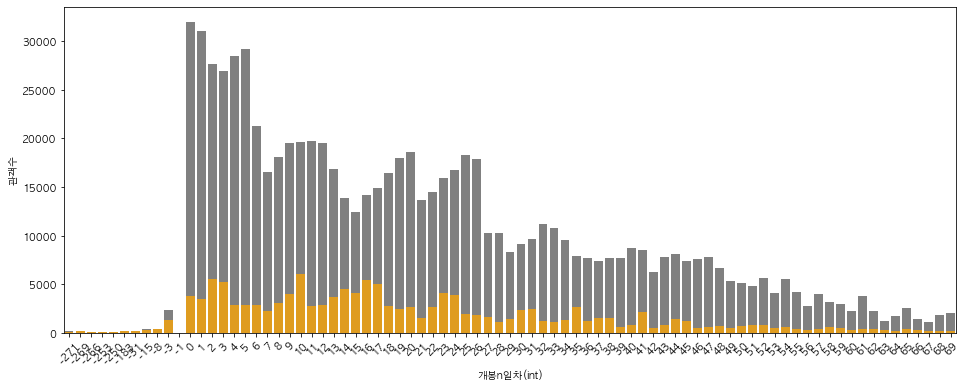

In [57]:
data = g2_daily.loc[g2_daily['영화명'] == '벌새', ['개봉n일차(int)', '좌석수', '관객수']]

plt.figure(figsize=[16, 6])
sns.barplot(x='개봉n일차(int)', y='좌석수', data=data, color='gray')
plt.xticks(rotation=45)

sns.barplot(x='개봉n일차(int)', y='관객수', data=data, color='orange')
plt.xticks(rotation=45)
plt.show()

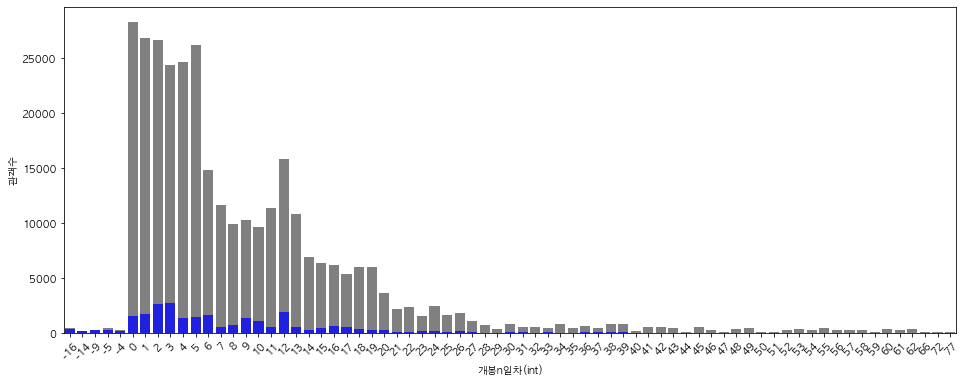

In [58]:
data = g2_daily.loc[g2_daily['영화명'] == '영주', ['개봉n일차(int)', '좌석수', '관객수']]

plt.figure(figsize=[16, 6])
sns.barplot(x='개봉n일차(int)', y='좌석수', data=data, color='gray')
plt.xticks(rotation=45)

sns.barplot(x='개봉n일차(int)', y='관객수', data=data, color='blue')
plt.xticks(rotation=45)
plt.show()

# 전체 상영횟수 중에 프라임시간대 상영횟수 비율

In [59]:
timetable = pd.read_csv('../01.Data_Collection/show_timetable.csv')
timetable.shape

(13135726, 9)

In [60]:
timetable['상영시각_시'] = timetable['상영시각'].apply(lambda x: x.split(':')[0]).astype(int)

In [61]:
prime_timetable = timetable[(timetable['상영시각_시']>=16) & (timetable['상영시각_시']<=22)]
prime_show_count = prime_timetable.groupby('영화명')['상영시각_시'].count().reset_index()
show_count = timetable.groupby('영화명')['상영시각_시'].count().reset_index()

In [62]:
prime_show_count = prime_show_count.merge(show_count, how='left', on='영화명').rename(columns={'상영시각_시_x':'프라임상영횟수', '상영시각_시_y':'전체상영횟수'})
prime_show_count = prime_show_count.merge(g2[['영화명', 'F-rated']], how='right', on='영화명')
len(prime_show_count)

195

In [63]:
prime_show_count.corr()

프라임상영횟수    전체상영횟수   F-rated
프라임상영횟수  1.000000  0.689502 -0.031600
전체상영횟수   0.689502  1.000000 -0.013814
F-rated -0.031600 -0.013814  1.000000

# 상영시간대별 총 공급 좌석수 비교

In [64]:
g2_daily.sample()

영화명     1623공급좌석수      영화코드  F등급     장르        등급     영화구분  \
11954  타이밍 136164.000000  20141598    1  애니메이션  15세이상관람가  독립/예술영화   

                     제작사          배급사  전체상영횟수  전국스크린수            전국매출액  전국관객수  \
11954  (주)효인엔터테인먼트,베데코리아  (주)스톰픽쳐스코리아    2835     196 284085200.000000  37711   

           서울매출액  서울관객수         감독1필모  감독1           감독1코드 감독1성별  감독2  \
11954  100876200  12633  타이밍|애니 프란체스카  민경조 10027767.000000    남자  박대열   

            감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별       작가 대표작가  \
11954  10028546.0    남자   -     -     -   -     -     -  이언희, 이권  이언희   

      대표작가(필명)      작가코드 작가성별 작가_대표역할  \
11954      이언희  10056602   여자      감독   

                                                    작가필모           배우 주연배우  \
11954  탐정: 리턴즈|미씽: 사라진 여자|타이밍|어깨 너머의 연인|해피 에로 크리스마스|....  엄상현,박지윤,성완경  엄상현   

           배우코드 배우성별 배우_대표역할  \
11954  10047326   남자      배우   

                                                    배우필모         개봉일  \
11954  극장판 헬로카봇 : 달나라를 구해줘!|프린스 코기|극장판 헬로카봇: 옴파로스 섬의 ...  2015-12-10   

           점유율집계일                        개봉n일차  개봉n일차(int)  일일상영횟수    상영점유율  \
11954  2015-12-06  -4 days +00:00:00.000000000          -4       5 0.051000   

       상영점유율순위  스크린수   스크린점유율  스크린점유율순위  좌석수     좌석판매율    좌석점유율  좌석점유율순위  \
11954       12     3 0.100000        15  618 25.900000 0.020000       14   

           매출액     누적매출액  관객수  누적관객수 장르_1번째  
11954  1461500  10280300  160   1184  애니메이션

In [65]:
g2.sample()

영화명    1623공급좌석수      영화코드         개봉일  F-rated     장르        등급  \
6  B급 며느리 81208.000000  20174323  2018-01-17        1  다큐멘터리  12세이상관람가   

      영화구분    제작사                 배급사  상영횟수  전국스크린수            전국매출액  전국관객수  \
6  독립/예술영화  영화연구소  (주)에스와이코마드,글뫼 주식회사  1922      56 152139100.000000  19459   

      서울매출액  서울관객수         감독1필모  감독1           감독1코드 감독1성별 감독2 감독2코드 감독2성별  \
6  83012200   9976  B급 며느리|경계|레즈  선호빈 20112324.000000    남자   -     -     -   

  감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별   작가 대표작가 대표작가(필명)      작가코드 작가성별 작가_대표역할  \
6   -     -     -   -     -     -  선호빈  선호빈      선호빈  20112324   남자      감독   

           작가필모                               배우 주연배우      배우코드 배우성별 배우_대표역할  \
6  B급 며느리|경계|레즈  김진영,조경숙,이현수,김진철,김청승,김현신,박봉남,김강수  김진영  20293129   여자      배우   

     배우필모  
6  B급 며느리

In [66]:
timetable.sample()

가격  상영관   상영시각        상영일자 영화명        좌석수        영화관 상영분류  \
8588680   12,000원  07관  13:35  2019-08-02  사자 206.000000  롯데시네마 영등포  디지털   

         상영시간대  상영시각_시  
8588680  데이라이트      13

In [67]:
g2_timetable = timetable[timetable['영화명'].isin(g2['영화명'])]

In [68]:
seats_by_time = g2_timetable.groupby(['상영시각_시', '영화명'])['좌석수'].sum().reset_index().rename(columns={'좌석수':'총공급좌석수'})

In [69]:
seats_by_time = seats_by_time.merge(g2[['영화명', 'F-rated']], how='left', on='영화명')

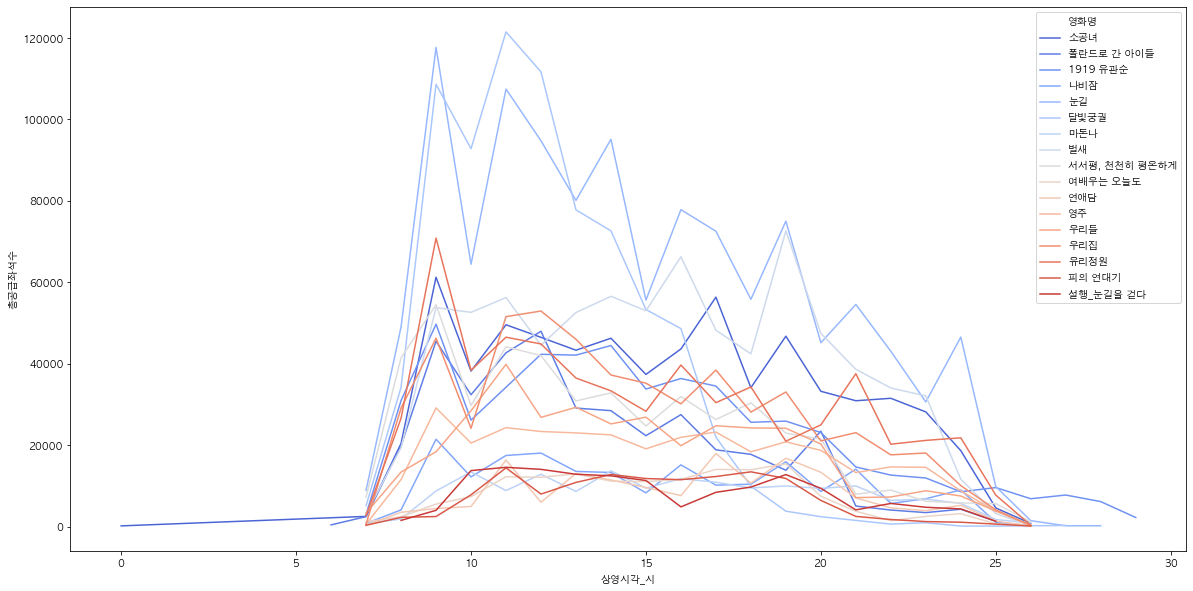

In [70]:
# F-3
plt.figure(figsize=[20, 10])
sns.lineplot(x='상영시각_시', y='총공급좌석수', hue='영화명', data=seats_by_time[seats_by_time['F-rated']==3], palette='coolwarm')
plt.show()

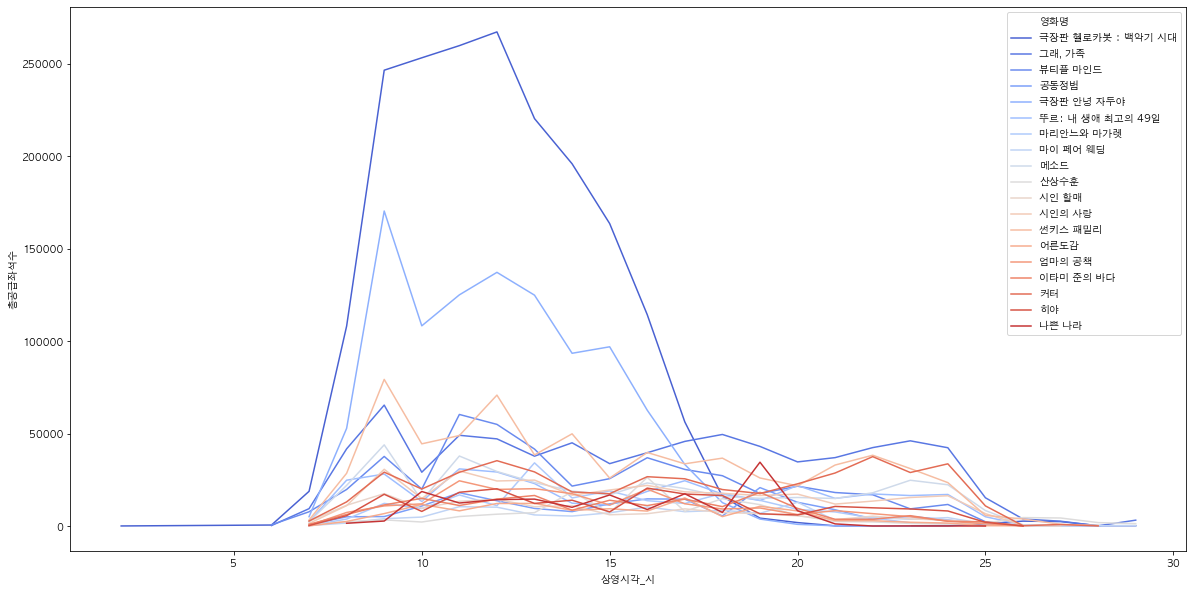

In [71]:
# F-2
plt.figure(figsize=[20, 10])
sns.lineplot(x='상영시각_시', y='총공급좌석수', hue='영화명', data=seats_by_time[seats_by_time['F-rated']==2], palette='coolwarm')
plt.show()

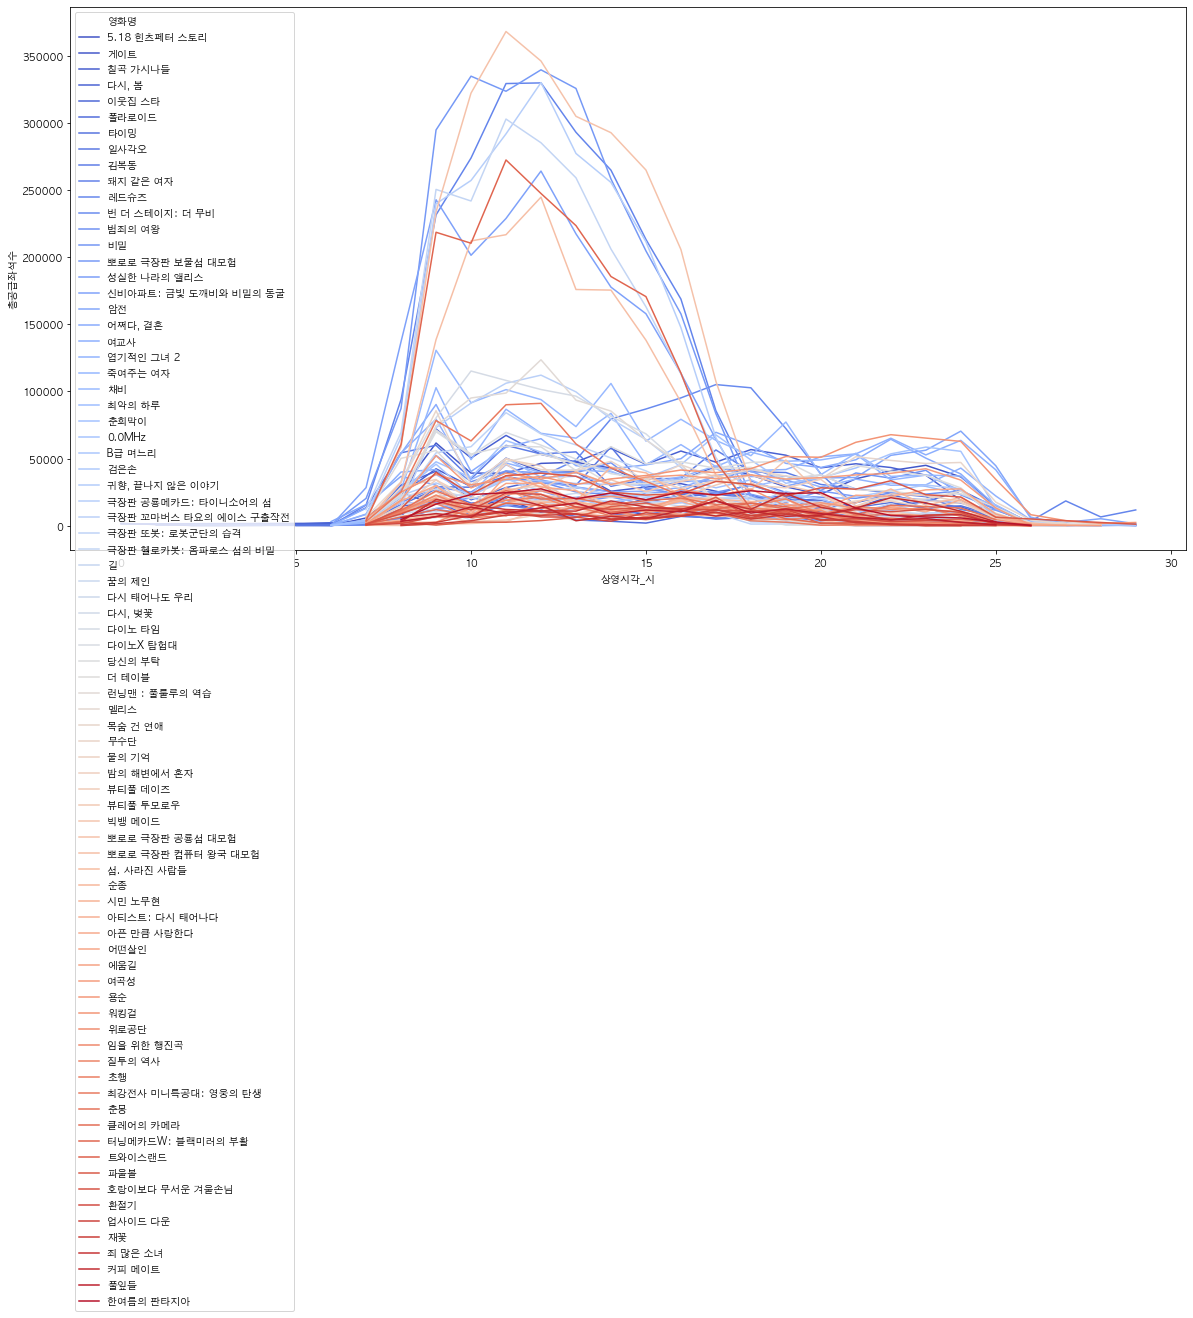

In [72]:
# F-1
plt.figure(figsize=[20, 10])
sns.lineplot(x='상영시각_시', y='총공급좌석수', hue='영화명', data=seats_by_time[seats_by_time['F-rated']==1], palette='coolwarm')
plt.show()

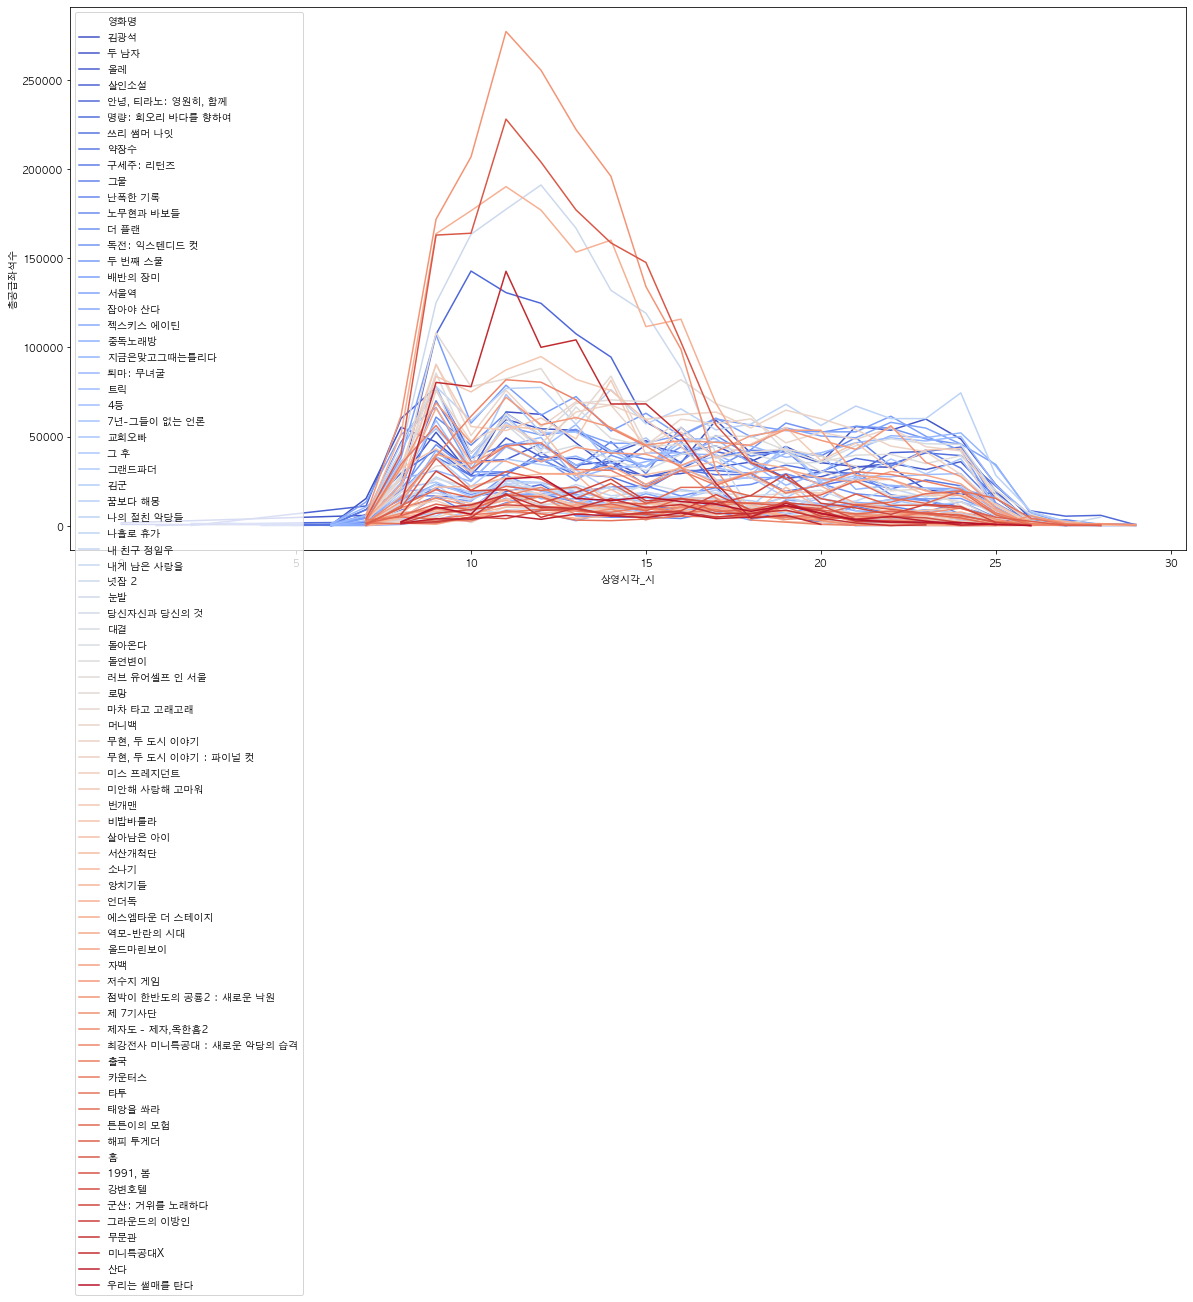

In [73]:
# F-0
plt.figure(figsize=[20, 10])
sns.lineplot(x='상영시각_시', y='총공급좌석수', hue='영화명', data=seats_by_time[seats_by_time['F-rated']==0], palette='coolwarm')
plt.show()

# '여배우는 오늘도'와 '머니백' 비교
'여배우는 오늘도': F-3  
'머니백': F-0

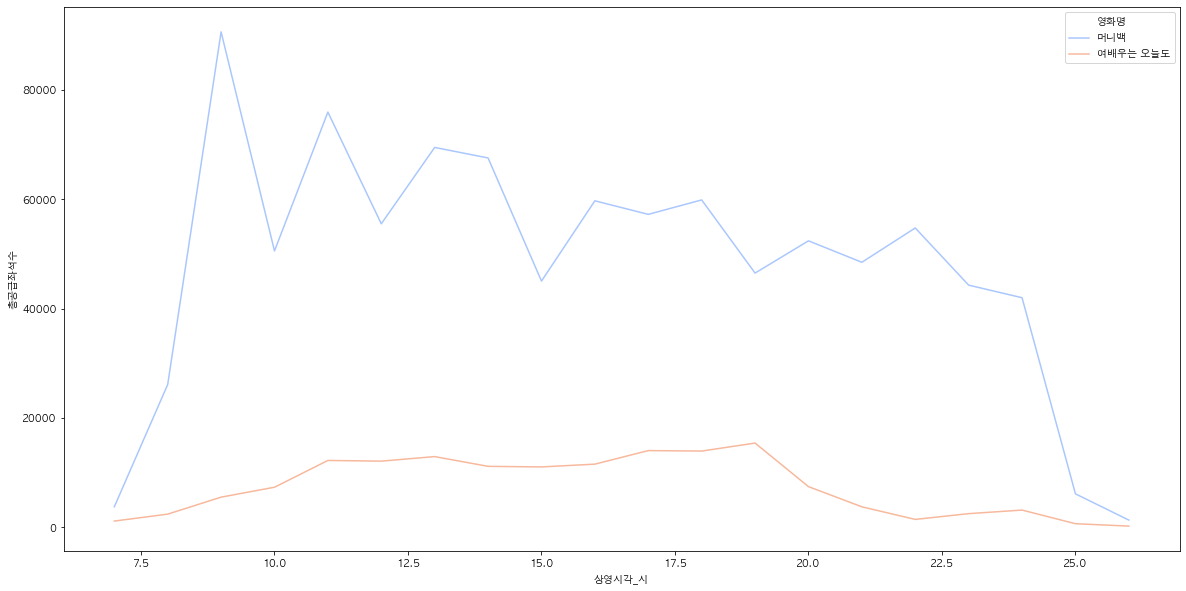

In [74]:
# F-0
plt.figure(figsize=[20, 10])
sns.lineplot(x='상영시각_시', y='총공급좌석수', hue='영화명', data=seats_by_time[seats_by_time['영화명'].isin(['여배우는 오늘도', '머니백'])], palette='coolwarm')
plt.show()

In [75]:
g2[g2['영화명'].isin(['여배우는 오늘도', '머니백'])]

영화명     1623공급좌석수      영화코드         개봉일  F-rated       장르        등급  \
69        머니백 378924.000000  20165045  2018-04-12        0   액션,드라마  15세이상관람가   
132  여배우는 오늘도  67537.000000  20172642  2017-09-14        3  드라마,코미디  15세이상관람가   

        영화구분        제작사        배급사  상영횟수  전국스크린수            전국매출액  전국관객수  \
69      일반영화    (주)젠픽쳐스  (주)리틀빅픽쳐스  6878     472 411511600.000000  52618   
132  독립/예술영화  (주)영화사 연두   (주)메타플레이  1271      46 137010300.000000  16646   

         서울매출액  서울관객수                                              감독1필모  감독1  \
69   105898500  12994                                                머니백  허준형   
132  100364500  11662  배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...  문소리   

              감독1코드 감독1성별 감독2 감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별  \
69  20238387.000000    남자   -     -     -   -     -     -   -     -     -   
132 10026732.000000    여자   -     -     -   -     -     -   -     -     -   

      작가 대표작가 대표작가(필명)      작가코드 작가성별 작가_대표역할  \
69   허준형  허준형      허준형  20238387   남자      감독   
132  문소리  문소리      문소리  10026732   여자      배우   

                                                  작가필모  \
69                                                 머니백   
132  배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...   

                                                    배우 주연배우      배우코드 배우성별  \
69   김무열,박희순,이경영,전광렬,임원희,오정세,김민교,이익준,이동진,이소희,이신영,이윤...  김무열  10004099   남자   
132            문소리,성병숙,윤상화,전여빈,이승훈,이정은,이정현,김래원,오민애,이승연  문소리  10026732   여자   

    배우_대표역할                                               배우필모  
69       배우  악인전|도터(가제)|정직한 후보|인랑|기억의 밤|대립군|머니백|연평해전|개들의 전쟁...  
132      배우  배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...

# 회귀분석
X: 상영시간대, 좌석수, F-rated  
y: 관객수

In [76]:
g2.sample()

영화명    1623공급좌석수      영화코드         개봉일  F-rated     장르       등급  \
36  난폭한 기록 52122.000000  20191845  2019-07-11        0  범죄,액션  청소년관람불가   

       영화구분                  제작사        배급사  상영횟수  전국스크린수           전국매출액  \
36  독립/예술영화  유한회사 영화사 반딧불,서울액션스쿨  케이티하이텔(주)  1199     152 72854090.000000   

    전국관객수     서울매출액  서울관객수                                              감독1필모  \
36  10153  39544880   6183  아이 캔 스피크|난폭한 기록|들개들|렛 미 아웃|뜨거운 안녕|그녀를 모르면 간첩|두...   

    감독1           감독1코드 감독1성별 감독2 감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4 감독4코드 감독4성별  \
36  하원준 10087180.000000    남자   -     -     -   -     -     -   -     -     -   

     작가 대표작가 대표작가(필명)      작가코드 작가성별 작가_대표역할  \
36  하원준  하원준      하원준  10087180   남자      감독   

                                                 작가필모  \
36  아이 캔 스피크|난폭한 기록|들개들|렛 미 아웃|뜨거운 안녕|그녀를 모르면 간첩|두...   

                                     배우 주연배우      배우코드 배우성별 배우_대표역할  \
36  정두홍,류덕환,서은아,정의갑,최제헌,김사권,권형준,김해인,손영순  정두홍  10061687   남자      배우   

                                                 배우필모  
36  인랑|군함도|그래, 가족|밀정|난폭한 기록|제 7기사단|베테랑|해무(海霧)|피크닉|...

In [77]:
g2_daily.sample()

영화명     1623공급좌석수      영화코드  F등급     장르     등급     영화구분            제작사  \
1024  교회오빠 180302.000000  20198597    0  다큐멘터리  전체관람가  독립/예술영화  KBS,커넥트픽쳐스(주)   

            배급사  전체상영횟수  전국스크린수            전국매출액   전국관객수      서울매출액  서울관객수  \
1024  커넥트픽쳐스(주)    5178     200 848041710.000000  106647  290442720  34889   

     감독1필모  감독1           감독1코드 감독1성별 감독2 감독2코드 감독2성별 감독3 감독3코드 감독3성별 감독4  \
1024  교회오빠  이호경 20322109.000000    남자   -     -     -   -     -     -   -   

     감독4코드 감독4성별   작가 대표작가 대표작가(필명)      작가코드 작가성별 작가_대표역할  작가필모           배우  \
1024     -     -  이호경  이호경      이호경  20322109   남자      감독  교회오빠  이관희,오은주,이소연   

     주연배우      배우코드 배우성별 배우_대표역할  배우필모         개봉일      점유율집계일  \
1024  이관희  20110987   남자      배우  교회오빠  2019-05-16  2019-10-13   

                            개봉n일차  개봉n일차(int)  일일상영횟수    상영점유율  상영점유율순위  스크린수  \
1024  150 days 00:00:00.000000000         150       3 0.034000       21     2   

       스크린점유율  스크린점유율순위  좌석수     좌석판매율    좌석점유율  좌석점유율순위     매출액      누적매출액  \
1024 0.100000        22  242 52.500000 0.010000       21  898000  860756710   

      관객수   누적관객수 장르_1번째  
1024  127  108184  다큐멘터리

In [78]:
timetable.sample()

가격  상영관   상영시각        상영일자  영화명        좌석수         영화관 상영분류  \
9664336   8,000원  03관  25:10  2019-08-01  엑시트 288.000000  롯데시네마 김포공항  디지털   

        상영시간대  상영시각_시  
9664336   나이트      25

In [79]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
film.shape

(662, 41)

In [80]:
film.columns

Index(['영화명', '영화코드', '개봉일', 'F-rated', '장르', '등급', '영화구분', '제작사', '배급사',
       '상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '감독1필모', '감독1',
       '감독1코드', '감독1성별', '감독2', '감독2코드', '감독2성별', '감독3', '감독3코드', '감독3성별',
       '감독4', '감독4코드', '감독4성별', '작가', '대표작가', '대표작가(필명)', '작가코드', '작가성별',
       '작가_대표역할', '작가필모', '배우', '주연배우', '배우코드', '배우성별', '배우_대표역할', '배우필모'],
      dtype='object')

In [81]:
timetable['상영시각_분'] = timetable['상영시각'].apply(lambda x: x.split(':')[1])

In [82]:
timetable.sample()

가격  상영관   상영시각        상영일자  영화명        좌석수      영화관 상영분류 상영시간대  \
6897457   10,000원  04관  22:05  2015-02-14  쎄시봉 143.000000  메가박스 울산  디지털  문라이트   

         상영시각_시 상영시각_분  
6897457      22     05

In [83]:
timetable.dtypes

가격         object
상영관        object
상영시각       object
상영일자       object
영화명        object
좌석수       float64
영화관        object
상영분류       object
상영시간대      object
상영시각_시      int64
상영시각_분     object
dtype: object

In [84]:
timetable = timetable.drop(['상영시각_시', '상영시각_분'], axis=1)
timetable.sample()

가격  상영관   상영시각        상영일자   영화명        좌석수     영화관 상영분류  상영시간대
3651082   11,000원  07관  14:30  2017-10-31  범죄도시 184.000000  CGV 판교  디지털  데이라이트

In [85]:
def showtime(x):
    if (x>='06:00') & (x<='10:00'): x = '모닝'
    elif (x>='10:01') & (x<='13:00'): x = '브런치' 
    elif (x>='13:01') & (x<='16:00'): x = '데이라이트' 
    elif (x>='16:01') & (x<='19:00'): x = '프라임1'
    elif (x>='19:01') & (x<='22:00'): x = '프라임2'
    elif (x>='22:01') & (x<='24:00'): x = '문라이트' 
    else: x = '나이트' 
    return x

In [86]:
timetable['상영시간대'] = timetable['상영시각'].apply(lambda x: showtime(x))

In [87]:
timetable.sample()

가격  상영관   상영시각        상영일자   영화명       좌석수          영화관 상영분류  \
9805662   6,000원  01관  09:00  2016-02-06  검사외전 59.000000  롯데시네마 광주터미널  디지털   

        상영시간대  
9805662    모닝

In [88]:
timetable.shape

(13135726, 9)

In [89]:
#timetable.to_csv('../01.Data_Collection/show_timetable.csv', index=False)

In [90]:
g2_time = timetable.merge(g2[['영화명', 'F-rated', '전국관객수']], how='right', on='영화명')

In [91]:
g2_time.shape

(821899, 11)

In [92]:
g2_time.head(5)

가격    상영관   상영시각        상영일자  영화명        좌석수              영화관 상영분류  \
0   10,000원    02관  12:30  2017-09-02  소나기 119.000000       롯데시네마 원주무실  디지털   
1   10,000원    02관  12:30  2017-09-03  소나기 119.000000       롯데시네마 원주무실  디지털   
2    6,000원  ART5관  20:30  2017-08-21  소나기 159.000000  CGV 명동역 씨네라이브러리  디지털   
3    6,000원  ART1관  19:00  2017-08-24  소나기 118.000000  CGV 명동역 씨네라이브러리  디지털   
4    6,000원  ART2관  19:05  2017-08-24  소나기 112.000000  CGV 명동역 씨네라이브러리  디지털   

  상영시간대  F-rated  전국관객수  
0   브런치        0  12425  
1   브런치        0  12425  
2  프라임2        0  12425  
3  프라임1        0  12425  
4  프라임2        0  12425

In [93]:
g2_time = g2_time.rename(columns={'F-rated':'F등급'})

In [94]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
# ols('좌석판매율~C(장르_1번째)', g2_daily).fit().summary() 

In [105]:
glm('상영시간대 ~ C(F등급)', g2_time).fit().summary()

ValueError: operands could not be broadcast together with shapes (821899,7) (821899,) 

모든 시간대에 F-rate가 높을 가능성이 크다?

In [96]:
ols('F등급 ~ 좌석수', g2_time).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    F등급   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     275.9
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           6.02e-62
Time:                        10:14:44   Log-Likelihood:            -1.0513e+06
No. Observations:              820491   AIC:                         2.103e+06
Df Residuals:                  820489   BIC:                         2.103e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8895      0.002    400.209      0.000       0.885       0.894
좌석수           -0.0003   1.63e-05    -16.610      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   102887.646   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145851.545
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       3.502   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-rate가 높을수록 작은 규모의 상영관을 배정 받는다. -0.0003 밖에 안되지만요..  
R-Squared=0으로 설명력이 낮다.

In [97]:
ols('전국관객수 ~ C(상영시간대)', g2_time).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:14:49   Log-Likelihood:            -1.1351e+07
No. Observations:              821899   AIC:                         2.270e+07
Df Residuals:                  821892   BIC:                         2.270e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.803e+04   1381.231     56.497      0.000    7.53e+04    8.07e+04
C(상영시간대)[T.데이라이트]  1.725e+05   1492.150    115.599      0.000     1.7e+05    1.75e+05
C(상영시간대)[T.모닝]     1.388e+05   1543.495     89.930      0.000    1.36e+05    1.42e+05
C(상영시간대)[T.문라이트]  -1.201e+04   1743.006     -6.890      0.000   -1.54e+04   -8592.541
C(상영시간대)[T.브런치]    1.775e+05   1475.975    120.253      0.000    1.75e+05     1.8e+05
C(상영시간대)[T.프라임1]   7.608e+04   1531.364     49.684      0.000    7.31e+04    7.91e+04
C(상영시간대)[T.프라임2]   -663.5064   1598.862     -0.415      0.678   -3797.223    2470.210
==============================================================================
Omnibus:                   167833.789   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291035.990
Skew:                           1.379   Prob(JB):                         0.00
Kurtosis:                       3.947   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

프라임2에 많이 배정되면 관객수가 많을 거라고 예상했는데 -663이라고..?

In [98]:
g2_time.sample()

가격  상영관   상영시각        상영일자         영화명        좌석수          영화관  \
605133   9,000원  01관  21:00  2017-04-10  밤의 해변에서 혼자 293.000000  씨네큐브광화문(서울)   

       상영분류 상영시간대  F등급  전국관객수  
605133  디지털  프라임2    1  56995

In [99]:
상영 = g2_time[['영화명', '상영일자', '좌석수', '영화관', '상영시간대']]
영화 = g2_time[['영화명', 'F등급', '전국관객수']]

시간대별 = pd.DataFrame(g2_time.groupby(['상영시간대','F등급'])['영화명'].value_counts()).rename(columns={'영화명':'횟수'}).reset_index()
시간대별[시간대별['상영시간대']=='나이트'].groupby('F등급')['영화명'].count()

F등급
0    76
1    76
2    18
3    17
Name: 영화명, dtype: int64

In [100]:
g2_time['프라임1_더미'] = g2_time['상영시간대'].apply(lambda x: 1 if x=='프라임1' else 0)

In [101]:
ols('전국관객수 ~ C(프라임1_더미)', g2_time).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4121.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:14:54   Log-Likelihood:            -1.1383e+07
No. Observations:              821899   AIC:                         2.277e+07
Df Residuals:                  821897   BIC:                         2.277e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.023e+05    301.566    670.902      0.000    2.02e+05    2.03e+05
C(프라임1_더미)[T.1]  -4.82e+04    750.834    -64.199      0.000   -4.97e+04   -4.67e+04
==============================================================================
Omnibus:                   198402.655   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376688.892
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                       4.122   Cond. No.                         2.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
ols('전국관객수 ~ 좌석수', g2_time).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     804.4
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          7.42e-177
Time:                        10:14:54   Log-Likelihood:            -1.1366e+07
No. Observations:              820491   AIC:                         2.273e+07
Df Residuals:                  820489   BIC:                         2.273e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.783e+05    640.277    278.494      0.000    1.77e+05     1.8e+05
좌석수          132.8596      4.685     28.361      0.000     123.678     142.041
==============================================================================
Omnibus:                   199123.937   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           379172.754
Skew:                           1.568   Prob(JB):                         0.00
Kurtosis:                       4.122   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

큰 규모의 상영관을 배정받는 영화일수록 전국관객수가 많다.

In [106]:
ols('전국관객수 ~ C(상영시간대) + 좌석수', g2_time).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:26:27   Log-Likelihood:            -1.1332e+07
No. Observations:              820491   AIC:                         2.266e+07
Df Residuals:                  820483   BIC:                         2.266e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.522e+04   1505.566     43.318      0.000    6.23e+04    6.82e+04
C(상영시간대)[T.데이라이트]  1.736e+05   1493.954    116.204      0.000    1.71e+05    1.77e+05
C(상영시간대)[T.모닝]     1.394e+05   1544.754     90.210      0.000    1.36e+05    1.42e+05
C(상영시간대)[T.문라이트]   -1.08e+04   1745.686     -6.184      0.000   -1.42e+04   -7374.643
C(상영시간대)[T.브런치]    1.784e+05   1477.518    120.764      0.000    1.76e+05    1.81e+05
C(상영시간대)[T.프라임1]   7.744e+04   1533.773     50.489      0.000    7.44e+04    8.04e+04
C(상영시간대)[T.프라임2]    700.7769   1601.774      0.438      0.662   -2438.647    3840.200
좌석수                  96.7760      4.503     21.491      0.000      87.950     105.602
==============================================================================
Omnibus:                   167429.370   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290239.914
Skew:                           1.378   Prob(JB):                         0.00
Kurtosis:                       3.947   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
ols('전국관객수 ~ C(상영시간대) * C(F등급)', g2_time).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     8404.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:15:21   Log-Likelihood:            -1.1285e+07
No. Observations:              821899   AIC:                         2.257e+07
Df Residuals:                  821871   BIC:                         2.257e+07
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      7.484e+04   1876.647     39.877      0.000    7.12e+04    7.85e+04
C(상영시간대)[T.데이라이트]              5.302e+04   2069.143     25.623      0.000     4.9e+04    5.71e+04
C(상영시간대)[T.모닝]                  3.48e+04   2145.916     16.218      0.000    3.06e+04     3.9e+04
C(상영시간대)[T.문라이트]              -4655.1726   2377.786     -1.958      0.050   -9315.555       5.210
C(상영시간대)[T.브런치]                5.462e+04   2043.355     26.732      0.000    5.06e+04    5.86e+04
C(상영시간대)[T.프라임1]                1.82e+04   2114.750      8.606      0.000    1.41e+04    2.23e+04
C(상영시간대)[T.프라임2]               -321.0359   2185.513     -0.147      0.883   -4604.569    3962.497
C(F등급)[T.1]                    1.421e+04   2742.476      5.181      0.000    8834.646    1.96e+04
C(F등급)[T.2]                   -2.895e+04   5176.832     -5.592      0.000   -3.91e+04   -1.88e+04
C(F등급)[T.3]                   -8820.8405   5427.023     -1.625      0.104   -1.95e+04    1815.944
C(상영시간대)[T.데이라이트]:C(F등급)[T.1]  2.091e+05   2972.159     70.342      0.000    2.03e+05    2.15e+05
C(상영시간대)[T.모닝]:C(F등급)[T.1]     1.833e+05   3079.405     59.516      0.000    1.77e+05    1.89e+05
C(상영시간대)[T.문라이트]:C(F등급)[T.1]  -1.719e+04   3468.278     -4.955      0.000    -2.4e+04   -1.04e+04
C(상영시간대)[T.브런치]:C(F등급)[T.1]    2.121e+05   2940.041     72.140      0.000    2.06e+05    2.18e+05
C(상영시간대)[T.프라임1]:C(F등급)[T.1]   1.147e+05   3052.829     37.588      0.000    1.09e+05    1.21e+05
C(상영시간대)[T.프라임2]:C(F등급)[T.1]   -104.0845   3193.278     -0.033      0.974   -6362.804    6154.635
C(상영시간대)[T.데이라이트]:C(F등급)[T.2]  2.371e+05   5567.115     42.591      0.000    2.26e+05    2.48e+05
C(상영시간대)[T.모닝]:C(F등급)[T.2]      2.39e+05   5701.635     41.917      0.000    2.28e+05     2.5e+05
C(상영시간대)[T.문라이트]:C(F등급)[T.2]  -1.407e+04   6530.402     -2.154      0.031   -2.69e+04   -1268.375
C(상영시간대)[T.브런치]:C(F등급)[T.2]    2.491e+05   5498.345     45.303      0.000    2.38e+05     2.6e+05
C(상영시간대)[T.프라임1]:C(F등급)[T.2]   1.064e+05   5701.602     18.661      0.000    9.52e+04    1.18e+05
C(상영시간대)[T.프라임2]:C(F등급)[T.2]  -4049.9419   6002.853     -0.675      0.500   -1.58e+04    7715.451
C(상영시간대)[T.데이라이트]:C(F등급)[T.3] -3.739e+04   5825.734     -6.418      0.000   -4.88e+04    -2.6e+04
C(상영시간대)[T.모닝]:C(F등급)[T.3]    -1.644e+04   5968.590     -2.754      0.006   -2.81e+04   -4738.906
C(상영시간대)[T.문라이트]:C(F등급)[T.3]   9790.0467   6688.275      1.464      0.143   -3318.751    2.29e+04
C(상영시간대)[T.브런치]:C(F등급)[T.3]   -3.768e+04   5767.799     -6.533      0.000    -4.9e+04   -2.64e+04
C(상영시간대)[T.프라임1]:C(F등급)[T.3]  -8701.6757   5873.630     -1.481      0.138   -2.02e+04    2810.445
C(상영시간대)[T.프라임2]:C(F등급)[T.3]   5475.6390   6010.359      0.911      0.362   -6304.466    1.73e+04
=============================================

In [ ]:
ols('전국관객수 ~ 좌석수 * C(F등급)', g2_time).fit().summary()

In [ ]:
ols('전국관객수 ~ C(상영시간대) * C(F등급) + 좌석수 * C(F등급)', g2_time).fit().summary()